In [2]:
from scipy.interpolate import BSpline
import numpy as np
from matplotlib import pyplot as plt

[0, 1, 2, 3, 4, 5, 6]


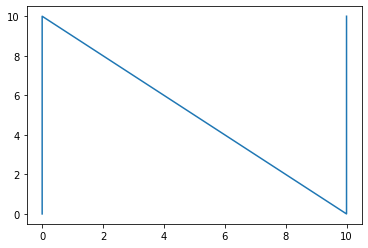

In [6]:
points = np.array([[0, 0], [0, 10], [10, 0], [10, 10]])
T = list(range(points.shape[0]+2+1))
print(T)
plt.plot(points.T[0], points.T[1])
plt.show()


In [5]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as


def bspline(cv, n=100, degree=3, periodic=False):
    """ Calculate n samples on a bspline

        cv :      Array ov control vertices
        n  :      Number of samples to return
        degree:   Curve degree
        periodic: True - Curve is closed
                  False - Curve is open
    """

    # If periodic, extend the point array by count+degree+1
    cv = np.asarray(cv)
    count = len(cv)

    if periodic:
        factor, fraction = divmod(count+degree+1, count)
        cv = np.concatenate((cv,) * factor + (cv[:fraction],))
        count = len(cv)
        degree = np.clip(degree,1,degree)

    # If opened, prevent degree from exceeding count-1
    else:
        degree = np.clip(degree,1,count-1)


    # Calculate knot vector
    kv = None
    if periodic:
        kv = np.arange(0-degree,count+degree+degree-1,dtype='int')
    else:
        kv = np.concatenate(([0]*degree, np.arange(count-degree+1), [count-degree]*degree))


    # Calculate query range
    u = np.linspace(periodic,(count-degree),n)


    # Calculate result
    return np.array(si.splev(u, (kv,cv.T,degree))).T

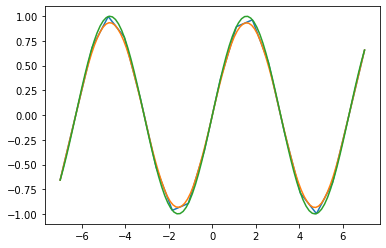

In [28]:
points = np.linspace(-7,7,20)
points = np.stack((points, np.sin(points))).T

test = bspline(points, periodic=False, degree=2)
plt.plot(points.T[0], points.T[1])
plt.plot(test.T[0], test.T[1])
plt.plot(np.linspace(-7,7,100),np.sin(np.linspace(-7,7,100)))

In [96]:
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

def plot_func(s,c,d,e,f, theta):

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ret = np.array([[-1,-1,1],[-1,1,1],[1,1,1],[1,-1,1], [-1,-1,1]])
    ret = ret.T
    rot = np.array(
        [[np.cos(theta),-np.sin(theta),0],
        [np.sin(theta),np.cos(theta),0],
        [0,0,1]])
    M = np.array(
        [[s,c,e],
        [d,s,f],
        [0,0,1]])
    trans = np.dot(M, rot)
    ret =  np.dot(trans,ret)
    ax.plot(ret[0], ret[1])
    ax.set_xlim(-5,5)
    ax.set_ylim(-5, 5)
    plt.show()


interact(plot_func, s=widgets.FloatSlider(value=1, min=-2, max=2.0, step=0.1), 
c=widgets.FloatSlider(value=0, min=-2, max=2.0, step=0.1), 
d=widgets.FloatSlider(value=0, min=-2, max=2.0, step=0.1),
e=widgets.FloatSlider(value=0, min=-2, max=2.0, step=0.1),
f=widgets.FloatSlider(value=0, min=-2, max=2.0, step=0.1),
theta=widgets.FloatSlider(value=0, min=-180, max=180, step=10))


interactive(children=(FloatSlider(value=1.0, description='s', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

<function __main__.plot_func(s, c, d, e, f, theta)>